In [1]:
from pandas import read_excel
from matplotlib.pyplot import (figure, plot, grid, xlabel, ylabel, show,
  legend, title)
from plot_fft_results import plotspec
from numpy import angle, rad2deg

file1 = 'expdata.xlsx'

data1 = read_excel(file1, sheet_name='Sheet1')
print(data1)

             t1    yg1     yg2_i
0      0.009992 -0.005 -0.005000
1      0.029959 -0.004 -0.004005
2      0.049927 -0.005 -0.005000
3      0.069894 -0.005 -0.004985
4      0.089861 -0.005 -0.004000
...         ...    ...       ...
1901  37.967902  0.005 -0.012468
1902  37.987869  0.001 -0.011580
1903  38.007837 -0.003 -0.008087
1904  38.027804 -0.009 -0.004550
1905  38.047771 -0.014 -0.001047

[1906 rows x 3 columns]


In [2]:
t1  = data1['t1'].values
yg1 = data1['yg1'].values
yg2_i = data1['yg2_i'].values

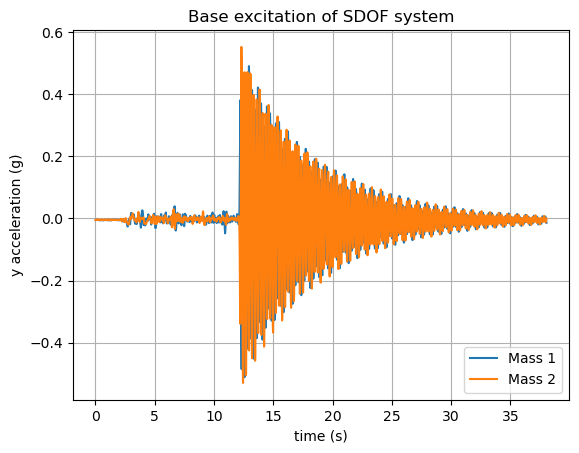

In [3]:
# %matplotlib qt5
# %matplotlib widget
# %matplotlib notebook

figure(1)
plot(t1,yg1,label = 'Mass 1')
plot(t1,yg2_i,label = 'Mass 2')
xlabel('time (s)')
ylabel('y acceleration (g)')
grid(True)
legend(loc='lower right')
title('Base excitation of SDOF system')
show()

# Spectrum analysis

(Fourier analysis)

What is done in the next cell with the function `plotspec` is certainly not the most efficient and correct way of doing spectrum analysis on measured vibration data, for, amongst others, the following reasons:
- No anti-aliasing filtering was employed before sampling the data.  When aliasing happens, the spectrum is contaminated below half the sampling frequency by whatever happens above half the sampling frequency.  To prevent aliasing, a high quality (as not to distort the phase information) analogue low pass filter must be employed before sampling the analogue signal, to remove any content above half the sampling frequency.  Our sampling frequency is about 50 Hz.  I am fairly confident that we do not have significant content in our acceleration signals above half the sampling frequency (25 Hz).
- The spectra should really be calculated through averaging a number of FFT results, employing power and cross spectra.  This is not done here.  Instead, we shall consider a single FFT of a single time window of data for each channel and use this to draw conclusions.  In this experiment this procedure works well enough to be used.

The `plotspec` functions calls the `numpy` `fft` function on time data from each measurement channel and then produce the spectra. FFT stands for Fast Fourier Transform.

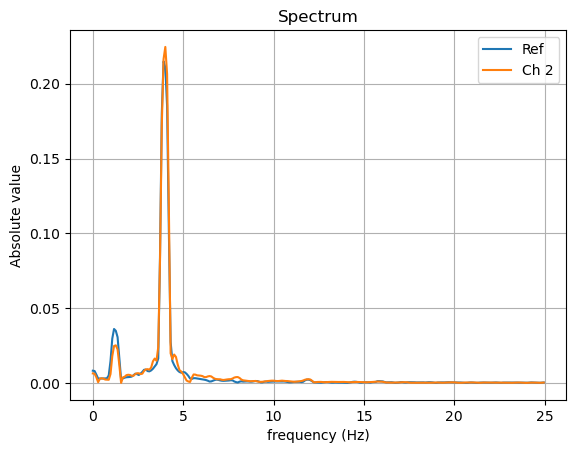

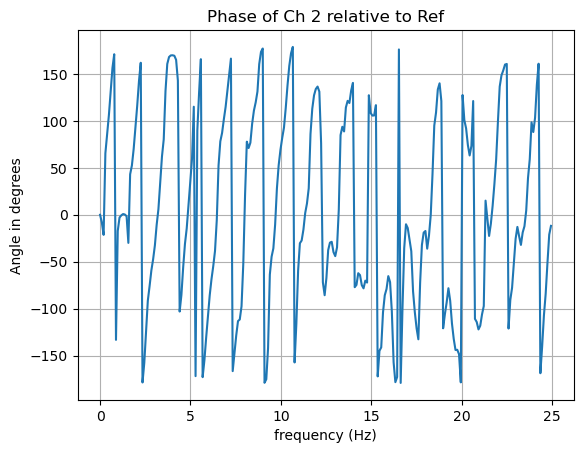

In [5]:
delt = t1[1]-t1[0]

plotspec(512,delt,yg1[613:],yg2_i[613:])  # Spectra of the first 1024 data points after 7.5 seconds of both the reference channel yg1
        #  and the response channel yg2_i